# **Tentang Dataset**

## **Latar Belakang & Konteks**
Dataset ini merupakan dataset pertumbuhan supermarket di kota yang memiliki  pertumbuhan penduduk dan persaingan pasar  yang semakin meningkat. Penjualan perusahaan supermarket yang tercatat di 3 cabang berbeda selama 3 bulan. Dataset ini mencakup beberapa atribut yang digunakan sebagai input, seperti ID faktur, cabang, kota, tipe pelanggan, gender, harga, tanggal, rating. Atribut kategori digunakan sebagai inti dari pembahasan, dimana untuk mengetahui kategori mana yang paling banyak dipilih.

## **Data Dictionary**

- Invoice ID: nomor faktur penjualan
- Branch: cabang, terdiri atas 3 cabang (A, B, C)
- City: lokasi supermarket
- Customer Type: jenis pelanggan, terdiri atas 2 tipe yaitu normal (tidak memiliki kartu anggota) dan member (memiliki kartu anggota)
- Gender: jenis kelamin pelanggan
- Product Line: kategori produk
- Unit Price: harga produk
- Quantity: kuantitas produk
- Date: tanggal pembelian
- Time: waktu pembelian
- Payment: jenis pembayaran, terdiri atas 3 metode (tunai, kartu kredit, e-wallet)
- Rating: penilaian pelanggan

## **Input Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

## Input Data dari Desktop

In [10]:
datafp = pd.read_csv('C:/Users/ghaniya/Downloads/dataset_final_project.csv')
datafp

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46,Ewallet,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16,Ewallet,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22,Cash,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33,Cash,4.1


## **Mengubah Value dari Dataset**

- Kolom Branch, value A diganti menjadi 1, B diganti menjadi 2, C diganti menjadi 3.
- Kolom City, value Yangon diganti menjadi 1, Naypyitaw diganti menjadi 2, Mandalay diganti menjadi 3.
- Kolom Customer type, value normal diganti menjadi 1, member menjadi 2.
- Kolom Product line, value Electronic accessories diganti menjadi 1, Fashion accessories diganti menjadi 2, Food and beverages diganti menjadi 3, Health and beauty diganti  menjadi 4, Home and lifestyle diganti menjadi 5, Sports and travel menjadi 6.
- Kolom Payment, value cash menjadi 1, credit card menjadi 2, Ewallet menjadi 3.

In [11]:
datafp['Branch'] = datafp['Branch'].replace(['A', 'B', 'C'], [1, 2, 3])
datafp['City'] = datafp['City'].replace(['Yangon', 'Naypyitaw', 'Mandalay'], [1, 2, 3])
datafp['Customer type'] = datafp['Customer type'].replace(['Normal', 'Member'], [1, 2])
datafp['Product line'] = datafp['Product line'].replace(['Electronic accessories', 'Fashion accessories',
                                                        'Food and beverages', 'Health and beauty', 'Home and lifestyle',
                                                        'Sports and travel'], [1, 2, 3, 4, 5, 6])
datafp['Payment'] = datafp['Payment'].replace(['Cash', 'Credit card', 'Ewallet'], [1, 2, 3])
datafp

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,1,1,2,Female,4,74.69,7,1/5/2019,13:08,3,9.1
1,226-31-3081,3,2,1,Female,1,15.28,5,3/8/2019,10:29,1,9.6
2,631-41-3108,1,1,1,Male,5,46.33,7,3/3/2019,13:23,2,7.4
3,123-19-1176,1,1,2,Male,4,58.22,8,1/27/2019,20:33,3,8.4
4,373-73-7910,1,1,1,Male,6,86.31,7,2/8/2019,10:37,3,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,3,2,1,Male,4,40.35,1,1/29/2019,13:46,3,6.2
996,303-96-2227,2,3,1,Female,5,97.38,10,3/2/2019,17:16,3,4.4
997,727-02-1313,1,1,2,Male,3,31.84,1,2/9/2019,13:22,1,7.7
998,347-56-2442,1,1,1,Male,5,65.82,1,2/22/2019,15:33,1,4.1


## **Menambah Kolom Dataset**

Pada cell di bawah akan ditambahkan kolom Total, Tax, dan Final price. 
- Penambahan kolom Total digunakan untuk menghitung total harga yang dibayarkan oleh pembeli. 
- Penambahan kolom Tax digunakan untuk penambahan pajak sebesar 5% dari total pembelian.
- Penambahan kolom Final price digunakan untuk mengetahui harga akhir setelah dikurangi pajak pembelian.

In [12]:
datafp['Total'] = datafp['Unit price'] * datafp['Quantity']
datafp['Tax'] = datafp['Total'] * 0.05
datafp['Final price'] = datafp['Total'] - datafp['Tax']
datafp

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Total,Tax,Final price
0,750-67-8428,1,1,2,Female,4,74.69,7,1/5/2019,13:08,3,9.1,522.83,26.1415,496.6885
1,226-31-3081,3,2,1,Female,1,15.28,5,3/8/2019,10:29,1,9.6,76.40,3.8200,72.5800
2,631-41-3108,1,1,1,Male,5,46.33,7,3/3/2019,13:23,2,7.4,324.31,16.2155,308.0945
3,123-19-1176,1,1,2,Male,4,58.22,8,1/27/2019,20:33,3,8.4,465.76,23.2880,442.4720
4,373-73-7910,1,1,1,Male,6,86.31,7,2/8/2019,10:37,3,5.3,604.17,30.2085,573.9615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,3,2,1,Male,4,40.35,1,1/29/2019,13:46,3,6.2,40.35,2.0175,38.3325
996,303-96-2227,2,3,1,Female,5,97.38,10,3/2/2019,17:16,3,4.4,973.80,48.6900,925.1100
997,727-02-1313,1,1,2,Male,3,31.84,1,2/9/2019,13:22,1,7.7,31.84,1.5920,30.2480
998,347-56-2442,1,1,1,Male,5,65.82,1,2/22/2019,15:33,1,4.1,65.82,3.2910,62.5290


## **Data Cleaning**

Tujuannya dilakukan data cleaning adalah untuk memastikan bahwa dataset penjualan supermarket ini tidak memiliki nilai NaN.

In [14]:
datafp.dropna()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating,Total,Tax,Final price
0,750-67-8428,1,1,2,Female,4,74.69,7,1/5/2019,13:08,3,9.1,522.83,26.1415,496.6885
1,226-31-3081,3,2,1,Female,1,15.28,5,3/8/2019,10:29,1,9.6,76.40,3.8200,72.5800
2,631-41-3108,1,1,1,Male,5,46.33,7,3/3/2019,13:23,2,7.4,324.31,16.2155,308.0945
3,123-19-1176,1,1,2,Male,4,58.22,8,1/27/2019,20:33,3,8.4,465.76,23.2880,442.4720
4,373-73-7910,1,1,1,Male,6,86.31,7,2/8/2019,10:37,3,5.3,604.17,30.2085,573.9615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,3,2,1,Male,4,40.35,1,1/29/2019,13:46,3,6.2,40.35,2.0175,38.3325
996,303-96-2227,2,3,1,Female,5,97.38,10,3/2/2019,17:16,3,4.4,973.80,48.6900,925.1100
997,727-02-1313,1,1,2,Male,3,31.84,1,2/9/2019,13:22,1,7.7,31.84,1.5920,30.2480
998,347-56-2442,1,1,1,Male,5,65.82,1,2/22/2019,15:33,1,4.1,65.82,3.2910,62.5290


##  Case 1 
Mengetahui penjualan terbanyak dari suatu kategori dan kuantitas tejualnya.

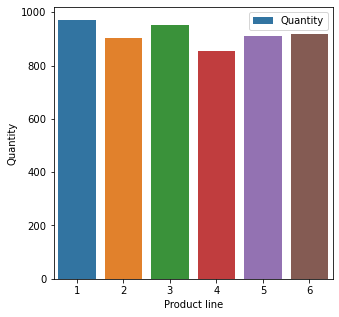

In [17]:
jumlah = datafp.groupby('Product line')['Quantity'].sum()

plt.figure(figsize=[5, 5])
sns.barplot(x = 'Product line', y = 'Quantity', data = jumlah.reset_index(), ci =0, label = 'Quantity')
plt.legend()

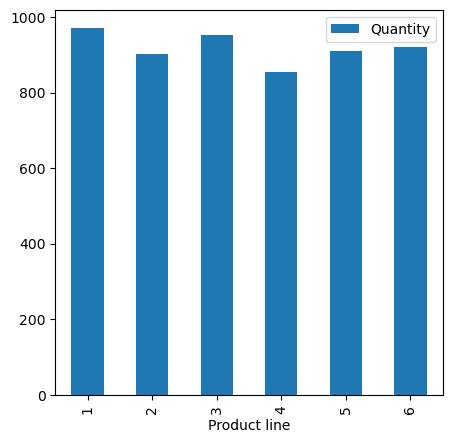

In [11]:
#code lainnya
jumlah = datafp.groupby('Product line')['Quantity'].sum()

plt.figure(figsize=[5, 5])
jumlah.plot(kind='bar', label = 'Quantity')
#buat neghapus garis grid
plt.grid(False)
plt.legend()

##  Case 2 
Mengetahui persentase pembeli dengan  tipe Normal (tidak memiliki kartu anggota) dan Member (memiliki kartu anggota).

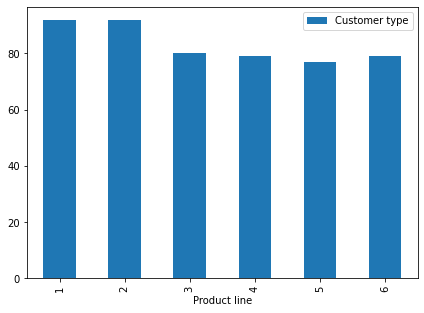

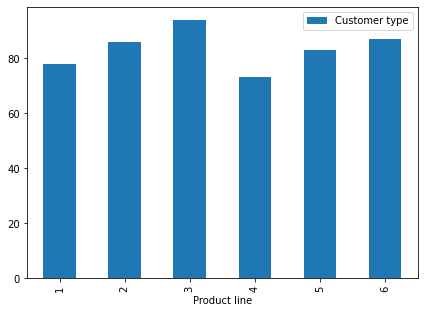

In [19]:
ct_normal = datafp[datafp['Customer type'] == 1]
ct_member = datafp[datafp['Customer type'] == 2]

product1 = ct_normal.groupby('Product line')['Product line'].count()
product2 = ct_member.groupby('Product line')['Product line'].count()

plt.figure(figsize = [7,5])
product1.plot(kind='bar', label = 'Customer type')
plt.grid(False)
plt.legend()

plt.figure(figsize = [7,5])
product2.plot(kind='bar', label = 'Customer type')
plt.grid(False)
plt.legend()

##  Case 3 
Mengetahui metode pembayaran yang paling banyak digemari oleh pembeli supermarket.

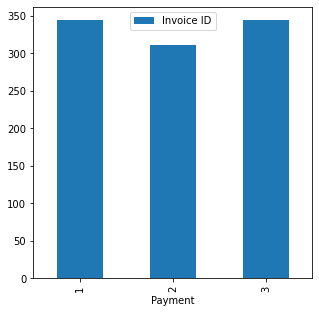

In [20]:
pay = datafp.groupby('Payment')['Payment'].count()
plt.figure(figsize = [5,5])
pay.plot(kind='bar', label = 'Invoice ID')
plt.grid(False)
plt.legend()

##  Case 4
Mengetahui persentase metode pembayaran yang paling digemari oleh pembeli supermarket.

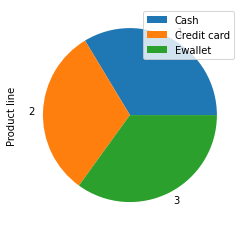

In [24]:
pie = datafp.groupby('Payment')['Product line'].sum()
pie.plot(kind='pie')
plt.legend(['Cash', 'Credit card', 'Ewallet'])

##  Case 5
Mengetahui jumlah keuntungan supermarket dari seluruh kategori.

<AxesSubplot:xlabel='Product line'>

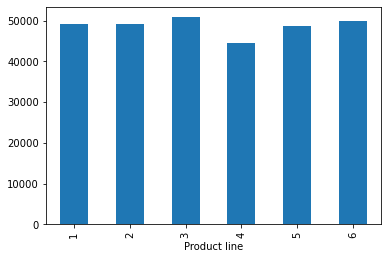

In [23]:
price = datafp.groupby('Product line')['Final price'].sum()
price.plot(kind='bar')